**Here we just imported the necessary libraries for the visualization and read the dataset**

In [13]:
# Import necessary libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'trains.csv'
train_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
train_data.head()


,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


**Now we Summarize the data set to start the EDA**

In [14]:
# Summary of the dataset for EDA
summary = {
    "Dataset Shape": train_data.shape,
    "Data Types": train_data.dtypes,
    "Missing Values": train_data.isnull().sum(),
    "Unique Values": train_data.nunique()
}

summary_stats = train_data.describe()

# Printing the summary and summary statistics
summary, summary_stats


({'Dataset Shape': (129880, 25),
  'Data Types': Legroom Service Rating             int64
  Onboard General Rating             int64
  Food'n'Drink Rating                int64
  Age                                int64
  Departure Arrival Time Rating      int64
  Onboard WiFi Rating                int64
  Ticket ID                          int64
  Checkin Rating                     int64
  Track Location Rating              int64
  Baggage Handling Rating            int64
  Arrival Delay in Minutes         float64
  Ticket Class                      object
  Loyalty                           object
  Gender                            object
  Boarding Rating                    int64
  Online Booking Rating              int64
  Satisfied                         object
  Onboard Entertainment Rating       int64
  Date and Time                     object
  Distance                           int64
  Seat Comfort Rating                int64
  Work or Leisure                   object
  Depar

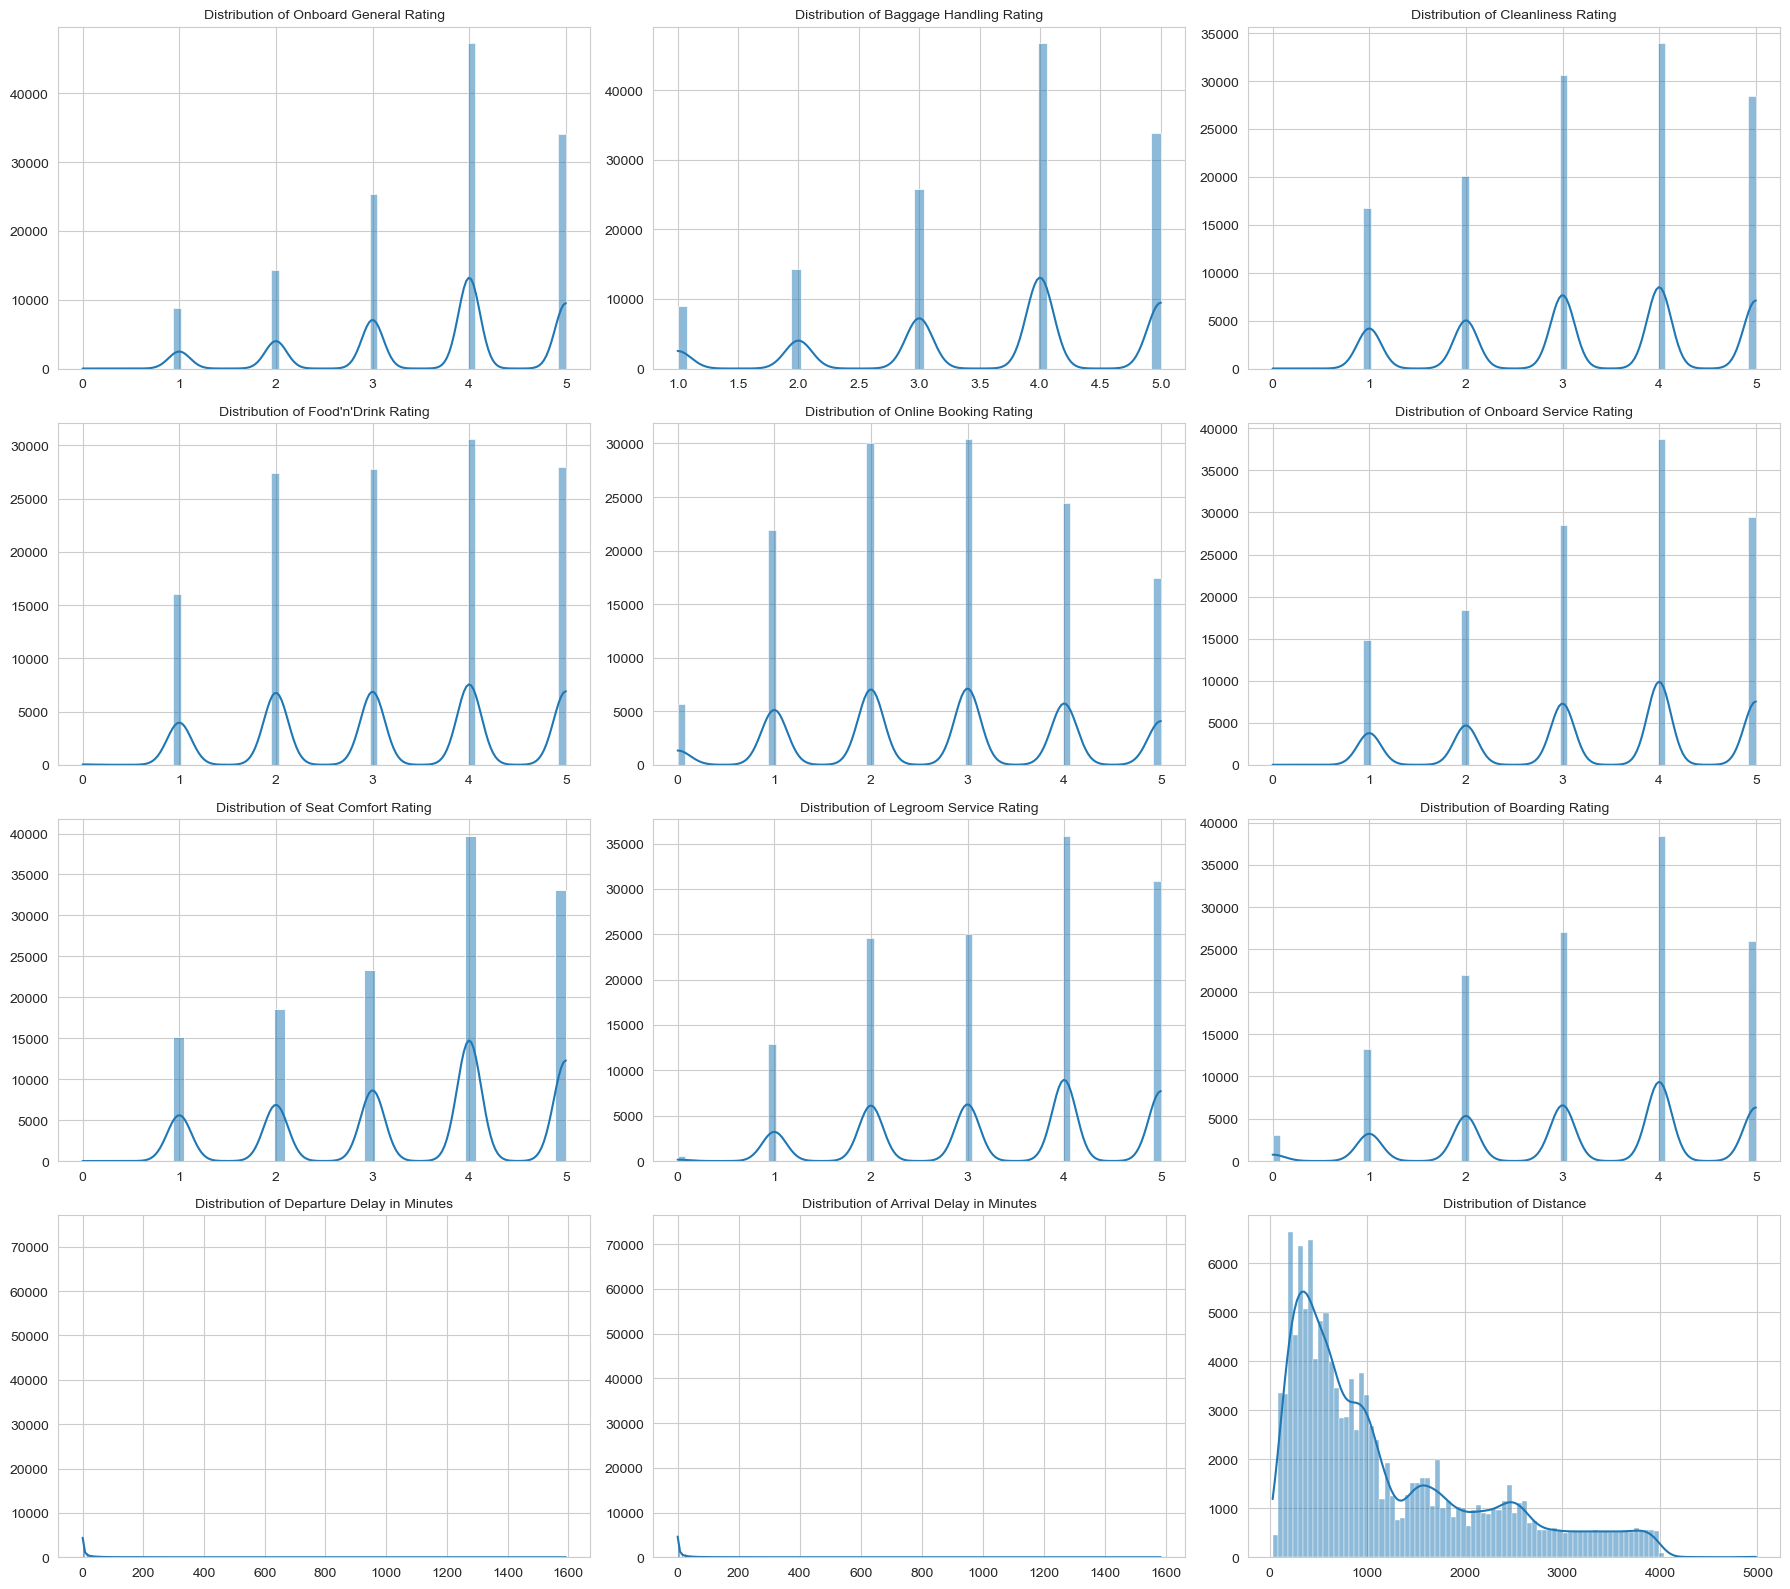

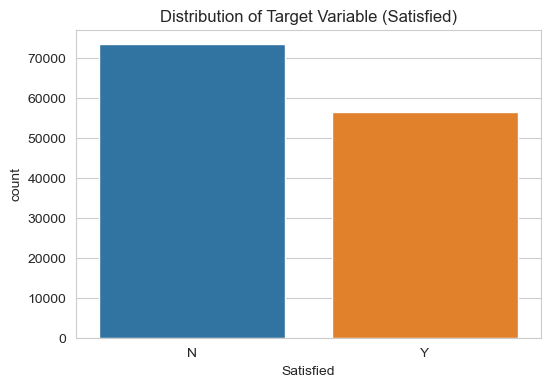

In [3]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of numerical features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

# List of numerical columns to plot
num_cols = [
    'Onboard General Rating', 'Baggage Handling Rating', 'Cleanliness Rating',
    "Food'n'Drink Rating", 'Online Booking Rating', 'Onboard Service Rating',
    'Seat Comfort Rating', 'Legroom Service Rating', 'Boarding Rating',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Distance'
]

for col, ax in zip(num_cols, axes.flatten()):
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Tight layout to prevent overlap
plt.tight_layout()

# Plot balance of target variable 'Satisfied'
plt.figure(figsize=(6, 4))
sns.countplot(x='Satisfied', data=train_data)
plt.title('Distribution of Target Variable (Satisfied)')
plt.show()


**Here we want to make sure that there are no null values in our target column**

In [4]:
# Confirm 'Satisfied' contains NaN values
print(f"NaN in 'Satisfied' column: {train_data['Satisfied'].isnull().any()}")

# Checking unique values in 'Satisfied' column
unique_values = train_data['Satisfied'].unique()
print(f"Unique values in 'Satisfied' column: {unique_values}")

# Correcting the mapping for the 'Satisfied' column
y_mapped_correctly = train_data['Satisfied'].map({'Y': 1, 'N': 0})

# Checking for NaN values after the correct mapping
print(f"NaN in correctly mapped 'y': {y_mapped_correctly.isnull().any()}")

NaN in 'Satisfied' column: False
Unique values in 'Satisfied' column: ['N' 'Y']
NaN in correctly mapped 'y': False


**As we can see based on the output, there are no null values**

In [5]:
# Copying the dataframe for correlation analysis
train_data_correlation = train_data.copy()

# Converting 'Satisfied' to a numerical value for correlation analysis
train_data_correlation['Satisfied'] = train_data_correlation['Satisfied'].map({'Y': 1, 'N': 0})

# Selecing only numeric columns for the correlation matrix
numeric_cols = train_data_correlation.select_dtypes(include=[np.number]).columns
train_data_numeric = train_data_correlation[numeric_cols]

# Computing the correlation matrix for numeric columns only
correlation_matrix = train_data_numeric.corr()


**Here we will display the correlation matrix so then we can see which are the ones that have higher correlation and then see which are the ones that do not matter that much**

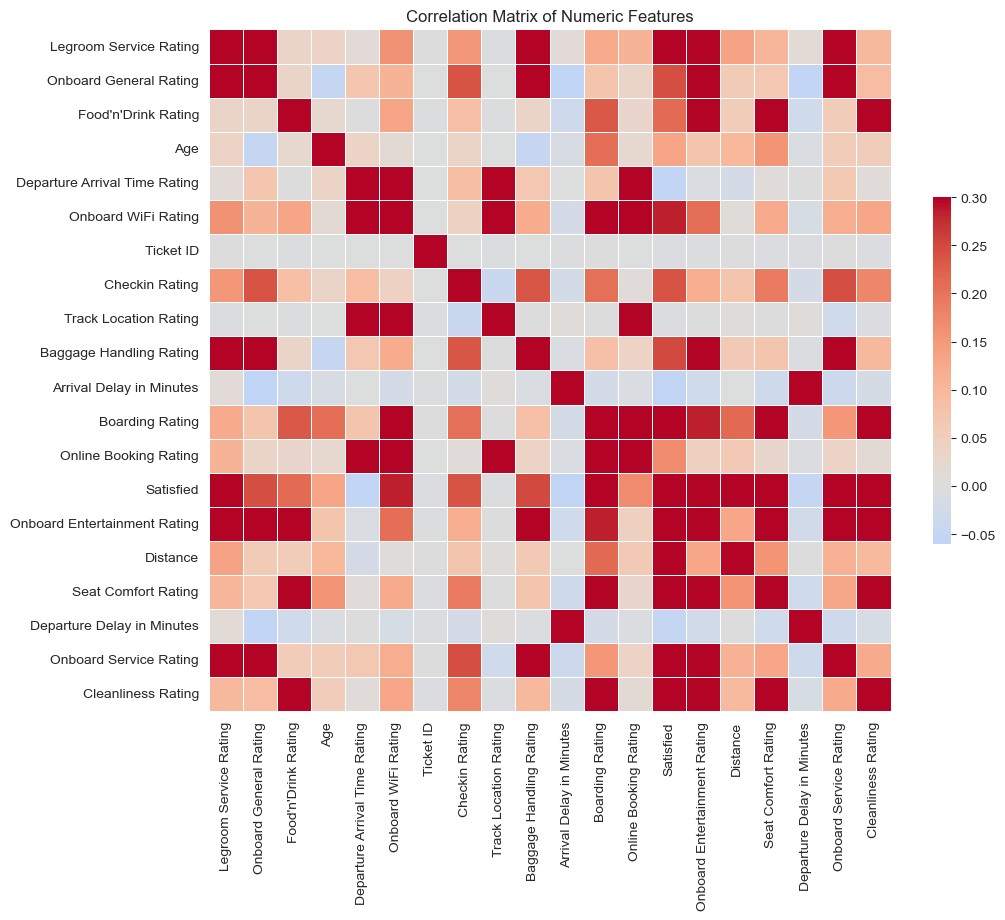

Boarding Rating                  0.501749
Onboard Entertainment Rating     0.398234
Seat Comfort Rating              0.348829
Onboard Service Rating           0.322205
Legroom Service Rating           0.312424
Cleanliness Rating               0.307035
Distance                         0.298085
Onboard WiFi Rating              0.283460
Baggage Handling Rating          0.248680
Onboard General Rating           0.244918
Checkin Rating                   0.237252
Food'n'Drink Rating              0.211340
Online Booking Rating            0.168877
Age                              0.134091
Track Location Rating           -0.002793
Ticket ID                       -0.004462
Departure Delay in Minutes      -0.050740
Departure Arrival Time Rating   -0.054270
Arrival Delay in Minutes        -0.058275
Name: Satisfied, dtype: float64

In [6]:
# Computing the correlation matrix for numeric columns only
correlation_matrix = train_data_numeric.corr()

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Drawing the heatmap for the entire matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Showing correlations of features with the target variable 'Satisfied'
correlations_with_target = correlation_matrix['Satisfied'].sort_values(ascending=False)
correlations_with_target.drop('Satisfied', inplace=True)  # Drop self-correlation
correlations_with_target


**Here we will filter our dataset and remove the ones that have less than the threshold which is the absolute value 0.15**

In [7]:
# Let's assume 'train_data' is your initial dataframe and 'train_data_correlation' is the dataframe with numerical features only.

# First, filter the numerical features based on the correlation threshold.
threshold = 0.15
features_to_keep = correlation_matrix.loc[:, 'Satisfied'][abs(correlation_matrix.loc[:, 'Satisfied']) >= threshold].index
numerical_filtered = train_data_correlation[features_to_keep]

# Now, retrieve the categorical features from the original dataframe.
categorical_columns = train_data.select_dtypes(include=['object', 'bool']).columns
categorical_data = train_data[categorical_columns]

# Combine the filtered numerical features with the categorical features.
train_data_filtered = pd.concat([numerical_filtered, categorical_data], axis=1)


# Display the filtered dataset
print(train_data_filtered)


        Legroom Service Rating  Onboard General Rating  Food'n'Drink Rating  \
0                            3                       5                    5   
1                            5                       4                    1   
2                            3                       4                    5   
3                            5                       4                    2   
4                            4                       3                    4   
...                        ...                     ...                  ...   
129875                       2                       5                    4   
129876                       5                       5                    4   
129877                       3                       4                    2   
129878                       2                       5                    4   
129879                       2                       1                    4   

        Onboard WiFi Rating  Checkin Rating  Baggag

In [8]:
# Drop the 'Satisfied' column from the filtered dataframe for features
x_filtered = train_data_filtered.drop('Satisfied', axis=1)

# Assuming 'Satisfied' is already encoded as 0 and 1
y_filtered = train_data_filtered['Satisfied']  # Target: 'Satisfied' column

# Define numerical and categorical columns from the filtered dataset
numerical_cols_filtered = x_filtered.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_filtered = x_filtered.select_dtypes(include=['object']).columns

# Print the column names of x
print("Columns in x_filtered:", x_filtered.columns)

# Assuming you have identified numerical and categorical columns already
print("Numerical columns:", numerical_cols_filtered)
print("Categorical columns:", categorical_cols_filtered)

# Make sure 'Satisfied' is not in these lists
# This step might be redundant if 'Satisfied' was already dropped
numerical_cols_filtered = numerical_cols_filtered[numerical_cols_filtered != 'Satisfied']
categorical_cols_filtered = categorical_cols_filtered[categorical_cols_filtered != 'Satisfied']


Columns in x_filtered: Index(['Legroom Service Rating', 'Onboard General Rating',
       'Food'n'Drink Rating', 'Onboard WiFi Rating', 'Checkin Rating',
       'Baggage Handling Rating', 'Boarding Rating', 'Online Booking Rating',
       'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating',
       'Onboard Service Rating', 'Cleanliness Rating', 'Ticket Class',
       'Loyalty', 'Gender', 'Date and Time', 'Work or Leisure'],
      dtype='object')
Numerical columns: Index(['Legroom Service Rating', 'Onboard General Rating',
       'Food'n'Drink Rating', 'Onboard WiFi Rating', 'Checkin Rating',
       'Baggage Handling Rating', 'Boarding Rating', 'Online Booking Rating',
       'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating',
       'Onboard Service Rating', 'Cleanliness Rating'],
      dtype='object')
Categorical columns: Index(['Ticket Class', 'Loyalty', 'Gender', 'Date and Time',
       'Work or Leisure'],
      dtype='object')


**In the next steps, we have implemented an automated process to impute missing values, standardize numerical features, and convert categorical variables into a one-hot encoded format. Subsequently, we partitioned the data into distinct training, validation, and test sets to facilitate a robust model training and evaluation phase, ensuring our model is tested on unbiased, unseen data.**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Numerical columns (as identified from your output)
numerical_cols = ['Legroom Service Rating', 'Onboard General Rating',
                  'Food\'n\'Drink Rating', 'Onboard WiFi Rating', 'Checkin Rating',
                  'Baggage Handling Rating', 'Boarding Rating', 'Online Booking Rating',
                  'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating',
                  'Onboard Service Rating', 'Cleanliness Rating']

# Categorical columns (excluding 'Satisfied')
categorical_cols = ['Ticket Class', 'Loyalty', 'Gender', 'Date and Time', 'Work or Leisure']

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a full pipeline with preprocessor
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])



In [10]:

from sklearn.model_selection import train_test_split

# Assuming 'train_data' is your main dataframe and 'Satisfied' is the target column

# Define the feature set 'x' by dropping the target variable 'Satisfied'
x = train_data_filtered.drop('Satisfied', axis=1)

# Select the numeric 'Satisfied' column from 'train_data_filtered'
y = train_data_filtered['Satisfied'].copy()

# If 'Satisfied' is a numeric column, ensuring it's a 1D array
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0] 


# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocesings the training data
X_train_processed = model_pipeline.fit_transform(X_train)
X_test_processed = model_pipeline.transform(X_test)



In [11]:
from sklearn.model_selection import train_test_split

# Split the training data again to create a validation set
X_train_final, X_validation, y_train_final, y_validation = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42
)

In [12]:
print(y_train_final)

74497     0
41659     0
79713     0
126038    0
60964     0
         ..
107609    1
66761     1
56044     1
82012     0
54156     0
Name: Satisfied, Length: 83123, dtype: int64


**In the continued pursuit of understanding our dataset after initial filtering, we performed additional EDA. We visually examined the distributions of the filtered numerical features by plotting histograms for each.**

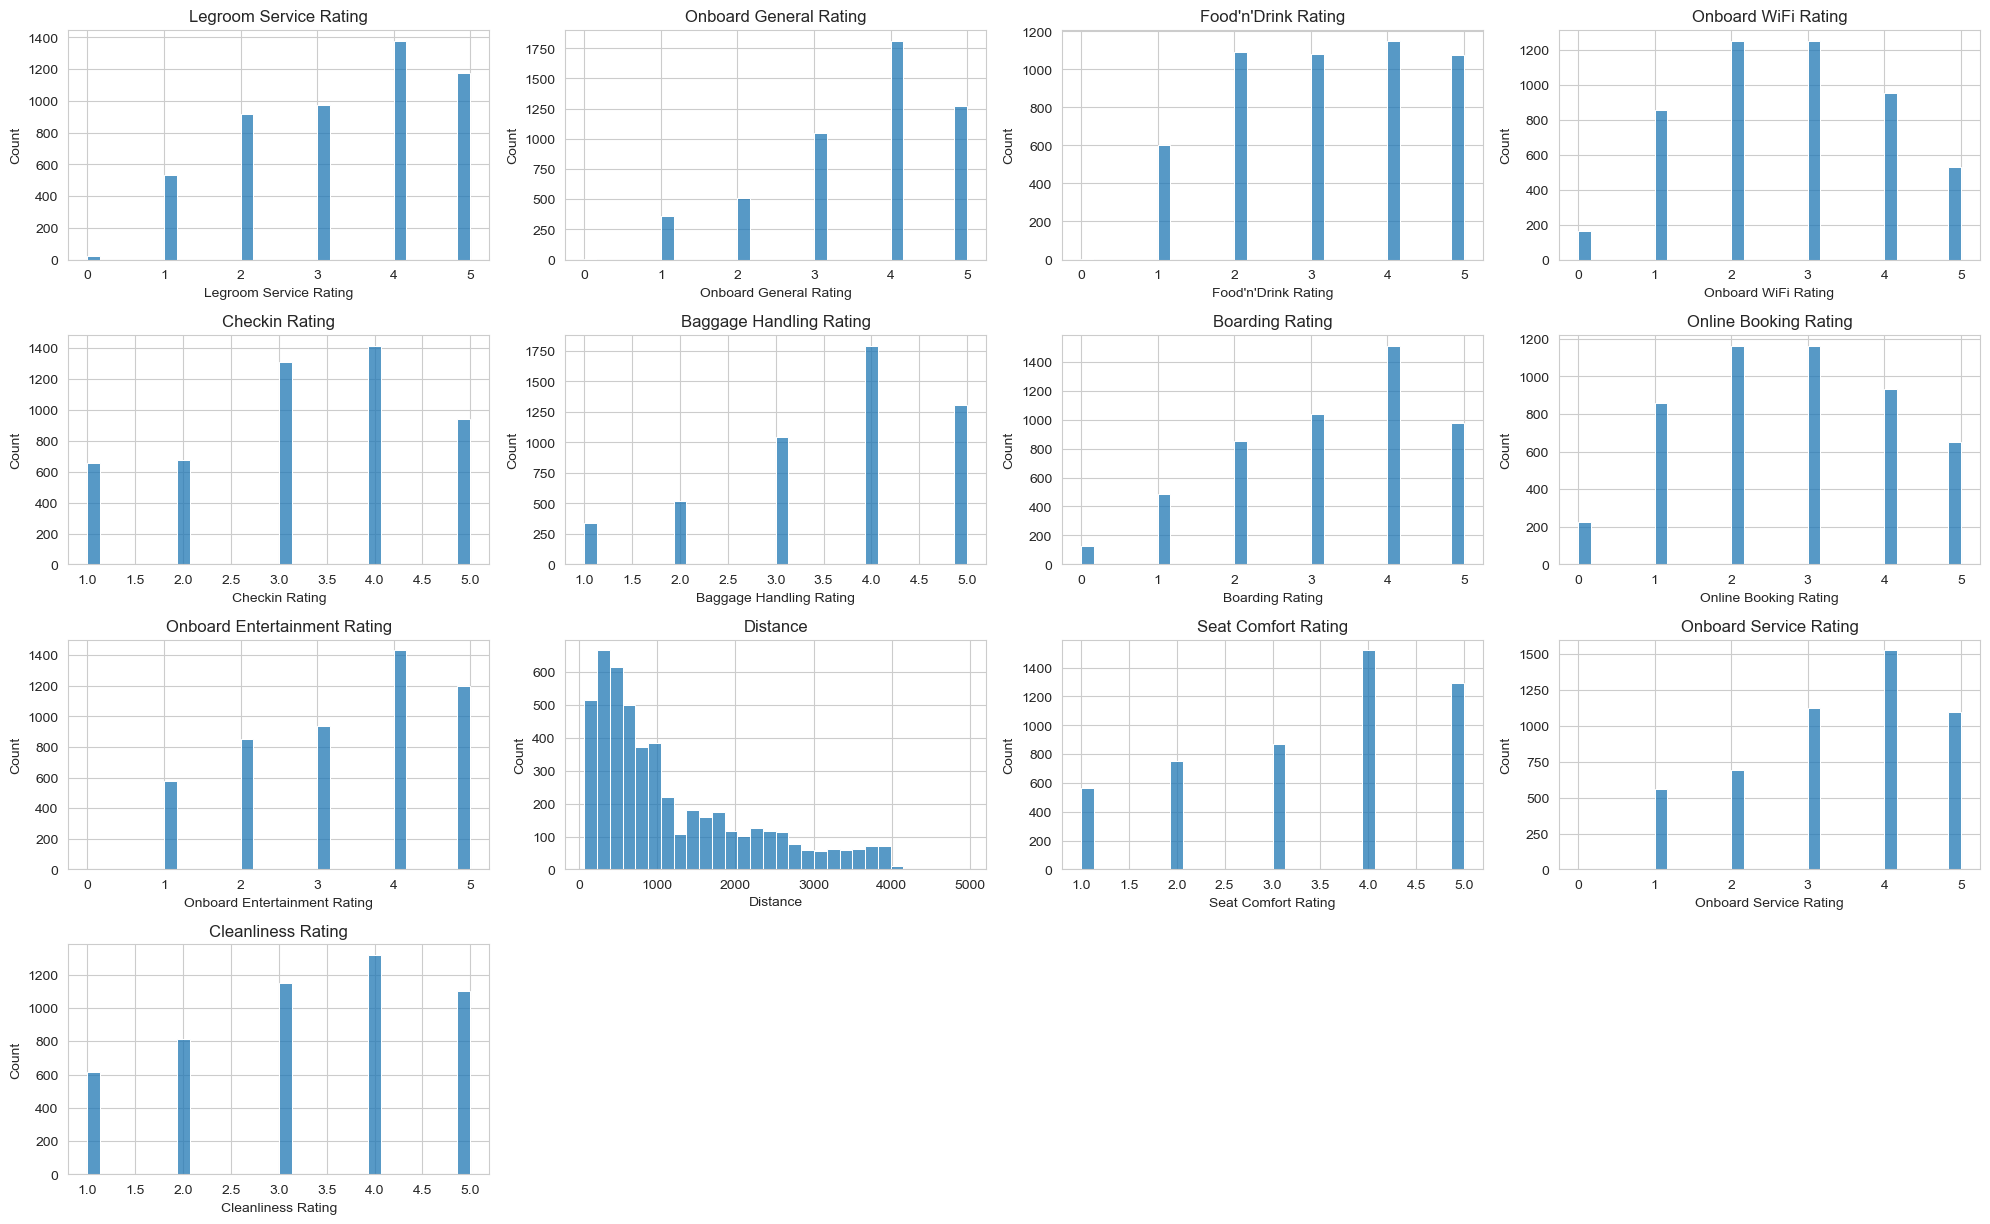

In [34]:


# Defining numerical and categorical columns from the filtered dataset
numerical_cols_filtered = train_data_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_filtered = train_data_filtered.select_dtypes(include=['object']).columns.tolist()

# Removing target variable 'Satisfied' from numerical columns if present
numerical_cols_filtered = [col for col in numerical_cols_filtered if col not in ['Satisfied']]

# Sampling the filtered numerical data for visualization
sampled_data_filtered = train_data_filtered[numerical_cols_filtered].sample(n=5000, random_state=1)

# Ploting histograms for the numerical features from the filtered data
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_cols_filtered, 1):
    plt.subplot(5, 4, i)  
    sns.histplot(sampled_data_filtered[col], kde=False, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()



**Subsequently, we generated a correlation matrix for the numerical features and visualized it through a heatmap**

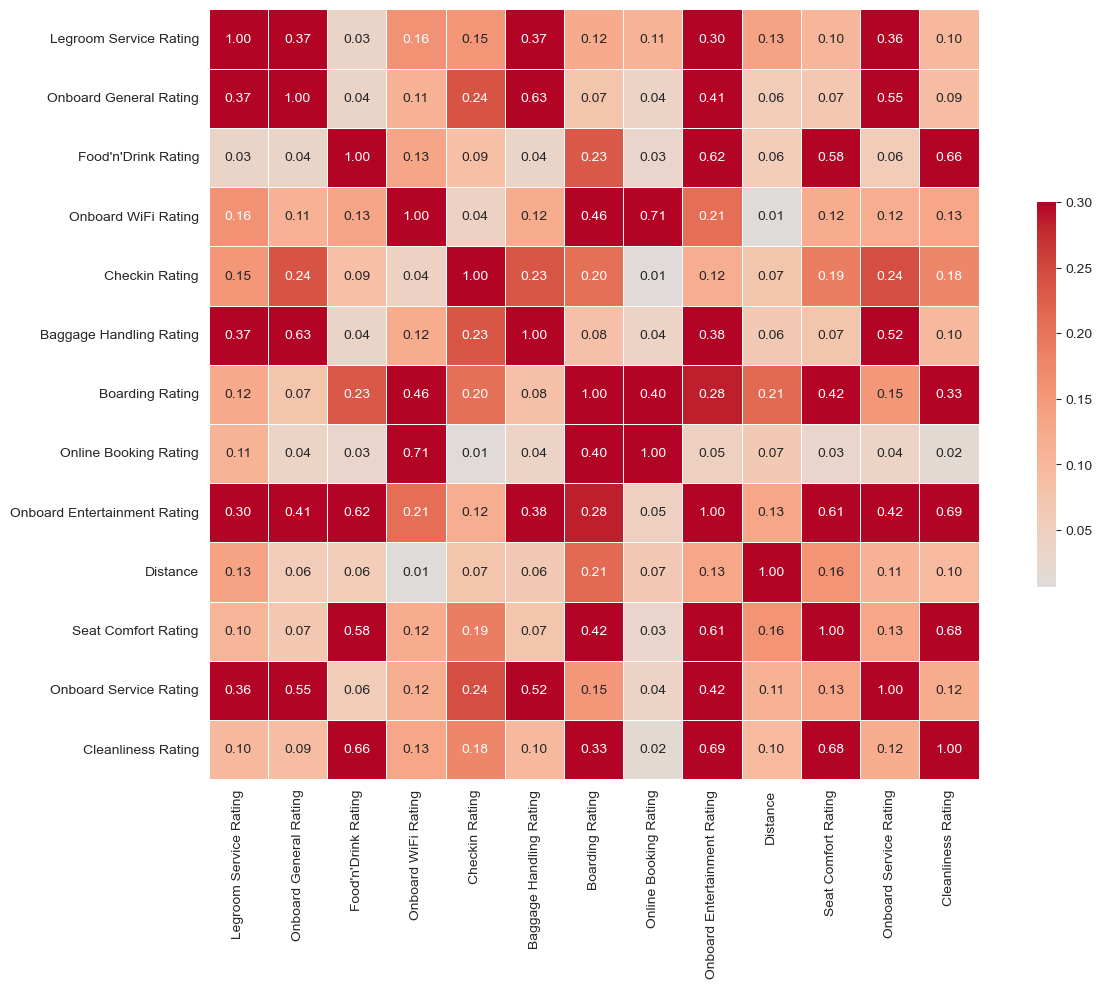

In [35]:
# Computing the correlation matrix for numerical features from the filtered data
corr_matrix_filtered = train_data_filtered[numerical_cols_filtered].corr()

# Drawing the heatmap for the entire correlation matrix of the filtered data
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.show()




In [36]:
# EDA on scaled numerical features of the filtered data
# Fiting and transforming the numerical features on a sample from the filtered data
numerical_sample_filtered = train_data_filtered[numerical_cols_filtered].sample(n=5000, random_state=1)
numerical_transformer.fit(numerical_sample_filtered)
scaled_numerical_sample_filtered = numerical_transformer.transform(numerical_sample_filtered)

# Converting the scaled numerical data back to a DataFrame for EDA
scaled_numerical_df_filtered = pd.DataFrame(scaled_numerical_sample_filtered, columns=numerical_cols_filtered)

# Summarizing statistics for the scaled numerical features from the filtered data
scaled_numerical_summary_filtered = scaled_numerical_df_filtered.describe().transpose()
print(scaled_numerical_summary_filtered)

                               count          mean     std       min  \
Legroom Service Rating        5000.0  1.711520e-16  1.0001 -2.523860   
Onboard General Rating        5000.0  1.187050e-16  1.0001 -3.086065   
Food'n'Drink Rating           5000.0  1.453060e-16  1.0001 -2.413055   
Onboard WiFi Rating           5000.0  2.496670e-16  1.0001 -2.045257   
Checkin Rating                5000.0 -1.389555e-16  1.0001 -1.772528   
Baggage Handling Rating       5000.0  2.202682e-16  1.0001 -2.262203   
Boarding Rating               5000.0 -9.956480e-17  1.0001 -2.409001   
Online Booking Rating         5000.0  1.330713e-16  1.0001 -1.949060   
Onboard Entertainment Rating  5000.0  2.043699e-16  1.0001 -2.543305   
Distance                      5000.0  8.606449e-17  1.0001 -1.107652   
Seat Comfort Rating           5000.0  9.956480e-17  1.0001 -1.852029   
Onboard Service Rating        5000.0  5.058176e-16  1.0001 -2.651354   
Cleanliness Rating            5000.0 -2.496225e-16  1.0001 -1.75

**The EDA performed on the scaled numerical features shows that all variables have been successfully normalized with a mean of zero and a standard deviation of one. This standardization ensures no single feature will disproportionately influence the model due to its scale. The quartile values confirm that the data variance is consistent across features, which is essential for effective model training and comparison of feature importance.**

**We initialized Logistic Regression, Decision Tree, and Random Forest models and trained them on our dataset. The models were then evaluated for accuracy on the validation set, enabling a direct performance comparison.**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1)

# Creating a dictionary of the models
models = {'Logistic Regression': log_reg,
          'Decision Tree': dec_tree,
          'Random Forest': rand_forest}

# Training and evaluate the models
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_val_pred = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_val_pred)
    print(f"{name} accuracy: {accuracy}")


/Users/antoniocagnucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.865405899619845
Decision Tree accuracy: 0.9518309994706703
Random Forest accuracy: 0.9496655598864348


Here we can see that the one with the higher accuracy is Decision trees

**We conducted cross-validation on our models to ensure robustness and prevent overfitting, obtaining mean accuracy and standard deviation for each, which provided a clear indication of their performance consistency.**

In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Defining a function for cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

# Dictionary to store the cross-validation results
cross_validation_results = {}

# Performing cross-validation for each model
for name, model in models.items():
    scores = cross_validate_model(model, X_train_final, y_train_final)
    cross_validation_results[name] = {
        'Mean Accuracy': np.mean(scores),
        'Standard Deviation': np.std(scores)
    }
    print(f"{name} - CV Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")

/Users/antoniocagnucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/antoniocagnucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Logistic Regression - CV Mean Accuracy: 0.8672, Std Dev: 0.0020
Decision Tree - CV Mean Accuracy: 0.9512, Std Dev: 0.0016
Random Forest - CV Mean Accuracy: 0.9509, Std Dev: 0.0021


**Now here we will find the best parameters for both random forests and decision trees**

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

# Defining the model
model = RandomForestClassifier(random_state=42)

# Defining the hyperparameters and the distributions to sample from
param_dist = {
    'n_estimators': stats.randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': stats.randint(2, 11),
    'min_samples_leaf': stats.randint(1, 5)
}

# Setup the random search with 10 iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, 
                                   random_state=42, scoring='accuracy')

# Performing the random search on the training data
random_search.fit(X_train_final, y_train_final)

# Getting the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=288; total time=  26.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=288; total time=  26.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=288; total time=  26.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=288; total time=  26.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=288; total time=  28.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=314; total time=  57.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=314; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=314; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=314; total time=  54.9s
[CV] END max_depth=Non

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats

# Defineing the model
model = DecisionTreeClassifier(random_state=42)

# Defineing the hyperparameters and the distributions to sample from
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': stats.randint(2, 20),
    'min_samples_leaf': stats.randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Setup the random search with 10 iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, 
                                   random_state=42, scoring='accuracy')

# Performing the random search on the training data
random_search.fit(X_train_final, y_train_final)

# Getting the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=7, min_samples_split=12; total time=   2.5s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=7, min_samples_split=12; total time=   2.6s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=8, min_samples_split=8; total time=   2.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=8, min_samples_split=8; total time=   2.9s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=7, min_samples_split=12; total time=   2.8s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=8, min_samples_split=8; total time=   2.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=8, min_samples_split=8; total time=   3.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=8, min_samples_split=8; total time=   3.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=7, min_samples_split=12; total time=   2.4s
[CV] END criterion=entropy, max_

**To understand the behavior of our models with increasing amounts of training data, we plotted learning curves.**

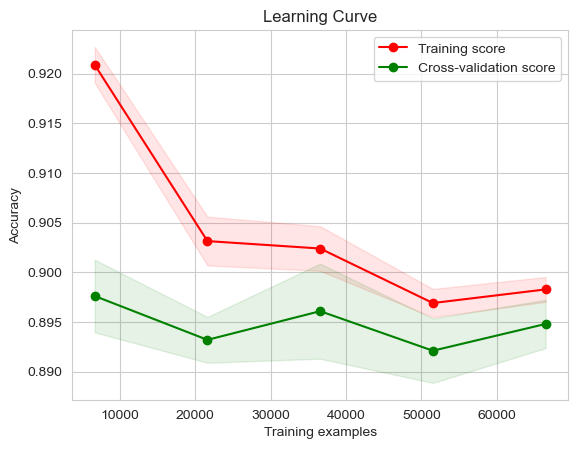

In [58]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model with the optimal hyperparameters
rand_forest = RandomForestClassifier(
    n_estimators=158, 
    max_depth=30, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)

# Defining the training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, train_sizes, cv=None, scoring='accuracy'):
    plt.figure()
    plt.title("Learning Curve")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=scoring)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the Learning Curve
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel(scoring.capitalize())
    plt.legend(loc="best")
    return plt

# Plotting the learning curve for Random Forest
plt_rf = plot_learning_curve(rand_forest, X_train_final, y_train_final, train_sizes)
plt_rf.show()

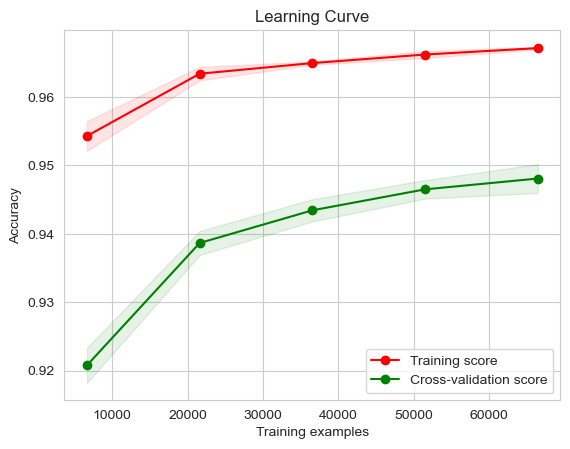

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import numpy as np

# Initializing the decision tree model with the optimal hyperparameters
dec_tree_best = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    min_samples_leaf=7,
    min_samples_split=10,
    random_state=42
)

# Defining the training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, train_sizes, cv=None, scoring='accuracy'):
    plt.figure()
    plt.title("Learning Curve")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=scoring)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the Learning Curve
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel(scoring.capitalize())
    plt.legend(loc="best")
    return plt

# Plotting the learning curve for Decision Tree with best parameters
plt_dt_best = plot_learning_curve(dec_tree_best, X_train_final, y_train_final, train_sizes)
plt_dt_best.show()

The learning curves for both the Random Forest and Decision Tree models indicated a good fit, as the training and validation scores converged to a high accuracy score with increasing data.

Now we will check the accuracy on the test set for both random forests and decision trees

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Defining the model with the best hyperparameters found during tuning
rf_best = RandomForestClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fitting the model on the entire training set 
rf_best.fit(X_train_processed, y_train)

# Predicting on the test set (which has been processed in the same way as the training set)
y_test_pred = rf_best.predict(X_test_processed)

# Evaluating the performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")


Test set accuracy: 0.8450492762550046


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Defining the model with the best hyperparameters found during tuning
dt_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fitting the model on the entire training set
dt_best.fit(X_train_processed, y_train)

# Predictting on the test set
y_test_pred = dt_best.predict(X_test_processed)

# Evaluating the performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")


Test set accuracy: 0.9524946104096089


We can conclude that decision trees have a higher accuracy on the test set as well

After tuning, we assessed the model performance on the unseen test set, and evaluated the models using metrics such as accuracy, precision, recall, f1-score, and the ROC-AUC score. 

In [62]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicting on the test set
y_test_pred_rf = rf_best.predict(X_test_processed)
y_test_pred_dt = dt_best.predict(X_test_processed)

# Classification report for RandomForest
print("Random Forest Performance Metrics:")
print(classification_report(y_test, y_test_pred_rf))

# ROC-AUC score for RandomForest
roc_auc_rf = roc_auc_score(y_test, rf_best.predict_proba(X_test_processed)[:, 1])
print(f"Random Forest ROC AUC score: {roc_auc_rf}\n")

# Classification report for DecisionTree
print("Decision Tree Performance Metrics:")
print(classification_report(y_test, y_test_pred_dt))

# ROC-AUC score for DecisionTree
roc_auc_dt = roc_auc_score(y_test, dt_best.predict_proba(X_test_processed)[:, 1])
print(f"Decision Tree ROC AUC score: {roc_auc_dt}")


Random Forest Performance Metrics:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     14622
           1       0.97      0.67      0.79     11354

    accuracy                           0.85     25976
   macro avg       0.88      0.83      0.83     25976
weighted avg       0.87      0.85      0.84     25976

Random Forest ROC AUC score: 0.9420040260889969

Decision Tree Performance Metrics:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14622
           1       0.96      0.93      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Decision Tree ROC AUC score: 0.9810694958313844


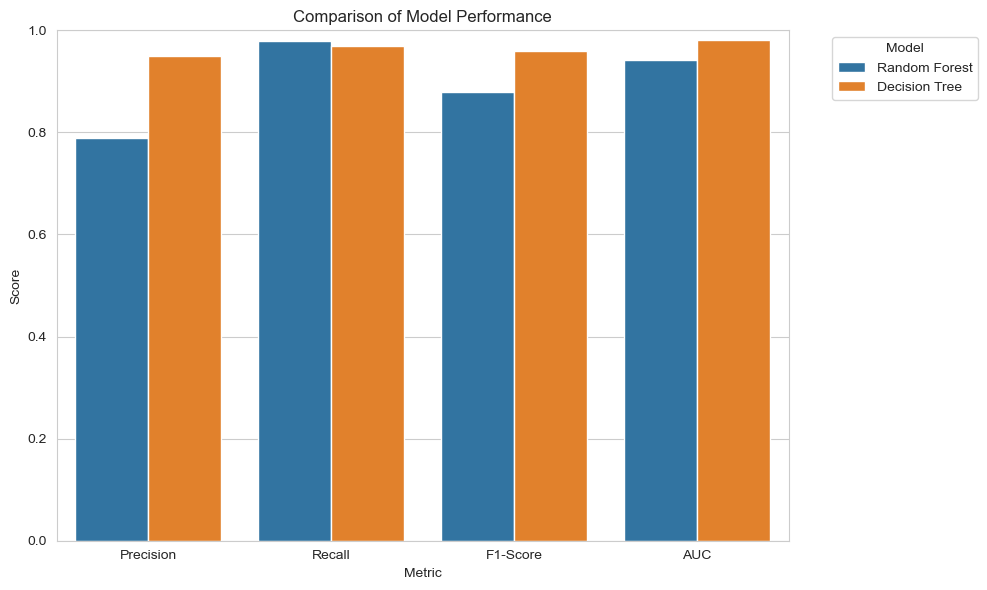

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    'Random Forest': [0.79, 0.98, 0.88, 0.9420],
    'Decision Tree': [0.95, 0.97, 0.96, 0.9810]
}
df = pd.DataFrame(data)

# Melting the dataframe to long-form for seaborn
df_long = pd.melt(df, id_vars=['Metric'], value_vars=['Random Forest', 'Decision Tree'],
                  var_name='Model', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=df_long)

# Moving the legend outside of the plot to prevent overlapping with the bars
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.ylim(0, 1)

# Display the plot
plt.tight_layout()  
plt.show()



The Random Forest model demonstrated a strong balance between precision and recall, indicating its robustness in handling both classes effectively.
The Decision Tree model, also showed high performance, likely due to the careful tuning of its hyperparameters. but the decision tree its better in every aspect except for the recall.